In [1]:
import control
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt
import math

In [2]:
s = sp.symbols("s")
W = control.tf([1],[1,2,1])
W

TransferFunction(array([1]), array([1, 2, 1]))

In [3]:
Wss = control.tf2ss(W)
Wss

StateSpace(array([[-2., -1.],
       [ 1.,  0.]]), array([[1.],
       [0.]]), array([[0., 1.]]), array([[0.]]))

In [4]:
Ae = np.array([[0,1],[-1,-2]])
Be =np.array([[0],[1]])
Ce = np.array([1,0])
print("A:", Ae)
print(" ")
print("B:",Be)
print(" ")
print("C:",Ce)

A: [[ 0  1]
 [-1 -2]]
 
B: [[0]
 [1]]
 
C: [1 0]


In [5]:
T = 0.1

In [6]:
I = np.eye(2)
I

array([[1., 0.],
       [0., 1.]])

In [7]:
A=I+Ae*T+(np.matmul(Ae,Ae)*((T**2)/math.factorial(2)))
A

array([[ 0.995,  0.09 ],
       [-0.09 ,  0.815]])

In [8]:
B=np.matmul((I*T)+(Ae*((T**2)/(math.factorial(2))))+(np.linalg.matrix_power(Ae,2)*((T**3)/(math.factorial(3))))+((np.linalg.matrix_power(Ae,3)*((T**4)/(math.factorial(4))))),Be)
B

array([[0.00467917],
       [0.09048333]])

In [9]:
Ze = sp.Matrix([[s,0],[0,s]])
Ze

Matrix([
[s, 0],
[0, s]])

In [10]:
A = sp.Matrix(A)
B = sp.Matrix(B)
A

Matrix([
[0.995,  0.09],
[-0.09, 0.815]])

In [11]:
B

Matrix([
[0.00467916666666667],
[ 0.0904833333333333]])

In [12]:
Z = Ze - A
Z

Matrix([
[s - 0.995,     -0.09],
[     0.09, s - 0.815]])

In [13]:
Z.inv()


Matrix([
[(0.09*s - 0.07335)/(0.09*s**2 - 0.1629*s + 0.07371225),     0.0081/(0.09*s**2 - 0.1629*s + 0.07371225)],
[                      0.09/(-s**2 + 1.81*s - 0.819025), (1.0*s - 0.995)/(1.0*s**2 - 1.81*s + 0.819025)]])

In [14]:
Z.det()

s**2 - 1.81*s + 0.819025

In [15]:
Zp1 = sp.Matrix([[s - 0.815, 0.09],[-0.09,s-0.995]])
Zp1

Matrix([
[s - 0.815,      0.09],
[    -0.09, s - 0.995]])

In [18]:
C = sp.Matrix(Ce)
C = C.transpose()
C


Matrix([[1, 0]])

In [19]:
Wz = C* Zp1 *B
Wz


Matrix([[0.00467916666666667*s + 0.00432997916666667]])

In [20]:
Wfinal = control.tf([0.00467916,+0.00432997],[1,-1.81,+0.819025],0.1)
#Wfinal = control.tf2ss(Wfinal)
Wfinal 

TransferFunction(array([0.00467916, 0.00432997]), array([ 1.      , -1.81    ,  0.819025]), 0.1)

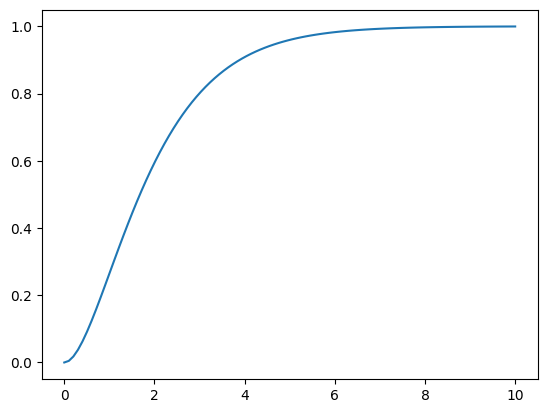

In [21]:
x1,y1 = control.step_response(W,10)
plt.plot(x1,y1)
plt.show()

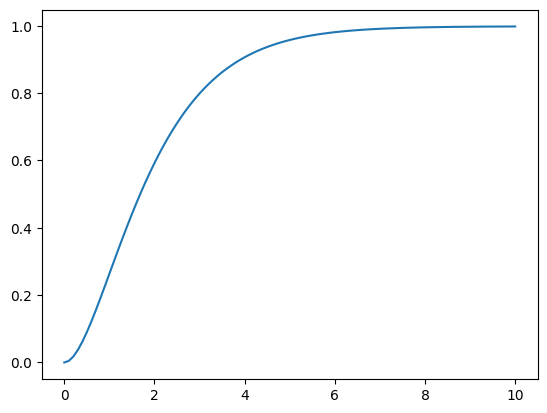

In [22]:
x2,y2 = control.step_response(Wfinal,10)
plt.plot(x2,y2)
plt.show()